In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def visualize(image):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [3]:
# đọc 3 ảnh lần lượt
lung_image = cv2.imread("Image.png")
label_image = cv2.imread("Label.png")
predict_image = cv2.imread("Predicted_Mask.png")

In [11]:

# Kiểm tra số lượng kênh màu
channels = cv2.split(lung_image)
num_channels = len(channels)

# In kết quả
print('Số lượng kênh màu:', num_channels)

Số lượng kênh màu: 3


In [4]:
# # đọc ảnh xám và ảnh nhị phân
# lung_image = cv2.imread('Image.png')
# mask_image = cv2.imread('Label.png')

# # hiển thị ảnh xám và ảnh mask
# result_image = cv2.bitwise_or(lung_image, mask_image)
# visualize(result_image)

In [5]:
def Digital_Image_Processing(lung_image, label_image, predict_image):
    label_image = cv2.cvtColor(label_image, cv2.COLOR_BGR2GRAY)
    predict_image = cv2.cvtColor(predict_image, cv2.COLOR_BGR2GRAY)

    # Chuyển ảnh label và predict về dạng binary
    label_image = cv2.threshold(label_image, 127, 255, cv2.THRESH_BINARY)[1]
    predict_image = cv2.threshold(predict_image, 127, 255, cv2.THRESH_BINARY)[1]

    # Nếu ảnh label và predict giống nhau thì vẽ màu xanh lên ảnh lung
    mask = np.logical_and(label_image, predict_image)
    lung_image[mask] = (0, 255, 0)

    # Nếu ảnh label không có mà ảnh predict có thì vẽ màu đỏ lên ảnh lung
    mask = np.logical_and(np.logical_not(label_image), predict_image)
    lung_image[mask] = (255, 0, 0)

    # Nếu ảnh label có mà ảnh predict không có thì vẽ màu vàng lên ảnh lung
    mask = np.logical_and(label_image, np.logical_not(predict_image))
    lung_image[mask] = (255, 255, 0)

    image = lung_image

    return image

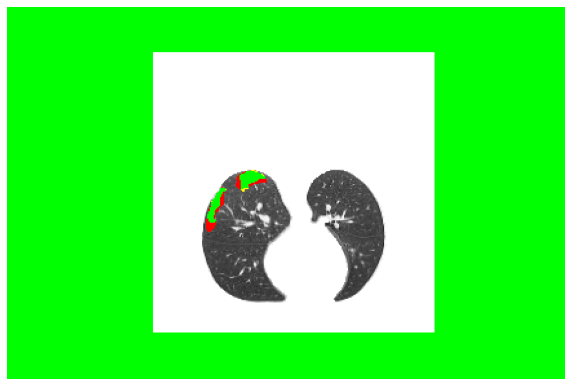

In [6]:
visualize(Digital_Image_Processing(lung_image, label_image, predict_image))